In [1]:
# importanto bibliotecas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


c:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
# lendo data

taylor = pd.read_csv('taylorswift.csv')


In [23]:
taylor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COLUMN_0          168 non-null    int64  
 1   NAME              168 non-null    object 
 2   ALBUM             168 non-null    object 
 3   ARTIST            168 non-null    object 
 4   RELEASE_DATE      168 non-null    object 
 5   LENGTH            168 non-null    int64  
 6   POPULARITY        168 non-null    int64  
 7   DANCEABILITY      168 non-null    float64
 8   ACOUSTICNESS      168 non-null    float64
 9   ENERGY            168 non-null    float64
 10  INSTRUMENTALNESS  168 non-null    float64
 11  LIVENESS          168 non-null    float64
 12  LOUDNESS          168 non-null    float64
 13  SPEECHINESS       168 non-null    float64
 14  VALENCE           168 non-null    float64
 15  TEMPO             168 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory us

In [24]:
taylor.head()

,COLUMN_0,NAME,ALBUM,ARTIST,RELEASE_DATE,LENGTH,POPULARITY,DANCEABILITY,ACOUSTICNESS,ENERGY,INSTRUMENTALNESS,LIVENESS,LOUDNESS,SPEECHINESS,VALENCE,TEMPO
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [25]:
# como artista sempre sera taylor pode remover essa coluna

taylor = taylor.drop(['ARTIST'], axis=1)

In [26]:
# remova tambem coluna index

taylor = taylor.drop(taylor.columns[0], axis=1)

In [27]:
taylor.head()

,NAME,ALBUM,RELEASE_DATE,LENGTH,POPULARITY,DANCEABILITY,ACOUSTICNESS,ENERGY,INSTRUMENTALNESS,LIVENESS,LOUDNESS,SPEECHINESS,VALENCE,TEMPO
0,Tim McGraw,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [28]:
# checando se ha valores nulos

taylor.isnull().any()

NAME                False
ALBUM               False
RELEASE_DATE        False
LENGTH              False
POPULARITY          False
DANCEABILITY        False
ACOUSTICNESS        False
ENERGY              False
INSTRUMENTALNESS    False
LIVENESS            False
LOUDNESS            False
SPEECHINESS         False
VALENCE             False
TEMPO               False
dtype: bool

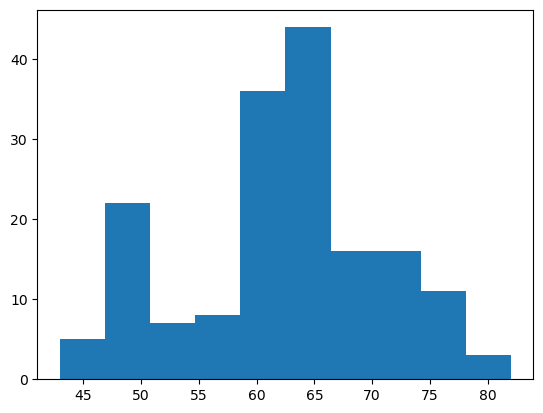

In [29]:
# entendendo como está a popularidade

plt.hist(taylor['POPULARITY'])
plt.show()

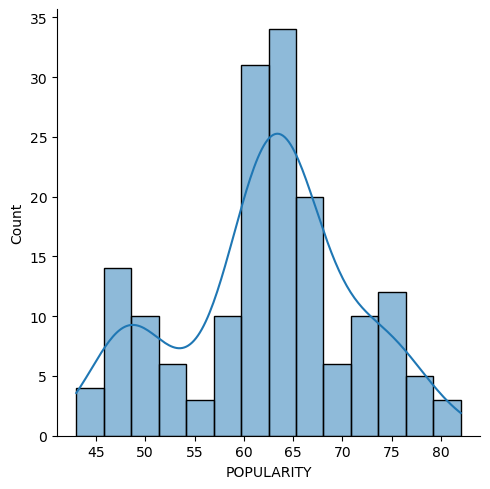

In [30]:
import statsmodels.api as sm 

sns.displot(taylor['POPULARITY'], kde=True)

In [31]:
# avaliando popularidade por cada album
sorted_taylor = taylor.groupby('ALBUM').mean(numeric_only=True).sort_values(['POPULARITY'], ascending=False)
sorted_taylor = sorted_taylor.reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_6036\1169983030.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_taylor['ALBUM'], y=sorted_taylor['POPULARITY'], palette=palette)


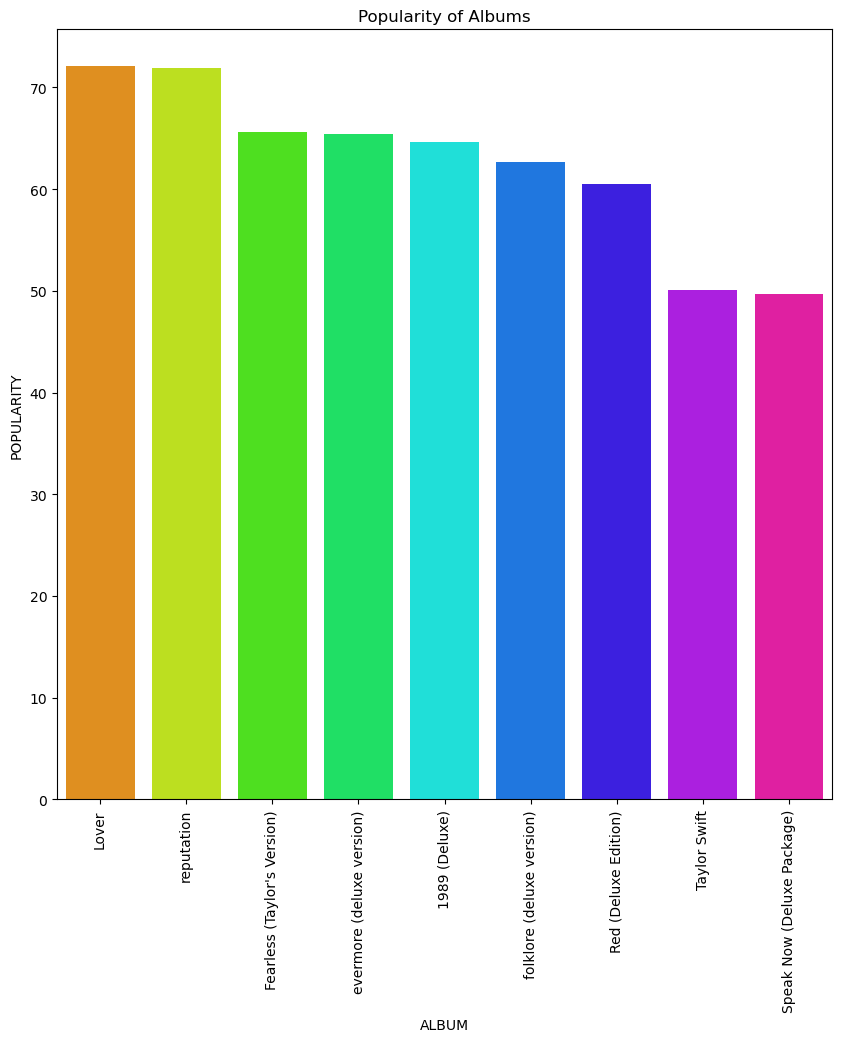

In [33]:
plt.figure(figsize=(10, 10))

# Crie uma paleta de cores com base no número de álbuns
palette = sns.color_palette("hsv", len(sorted_taylor['ALBUM']))

# Crie o gráfico de barras com a paleta de cores personalizada
sns.barplot(x=sorted_taylor['ALBUM'], y=sorted_taylor['POPULARITY'], palette=palette)

# Configure os rótulos e o título do gráfico
plt.xlabel('ALBUM')
plt.ylabel('POPULARITY')
plt.xticks(rotation=90)
plt.title('Popularity of Albums')

# Mostre o gráfico
plt.show()

In [ ]:
# lover e reputation eram os álbuns mais populares até 2019

In [39]:
# encontrando as 10 músicas mais populares

toptaylor= taylor.nlargest(10, ['POPULARITY'])
toptaylor.head()

,NAME,ALBUM,RELEASE_DATE,LENGTH,POPULARITY,DANCEABILITY,ACOUSTICNESS,ENERGY,INSTRUMENTALNESS,LIVENESS,LOUDNESS,SPEECHINESS,VALENCE,TEMPO
60,Blank Space,1989 (Deluxe),2014-01-01,231826,82,0.760,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997
64,Shake It Off,1989 (Deluxe),2014-01-01,219200,80,0.647,0.06470,0.800,0.000000,0.3340,-5.384,0.1650,0.9420,160.078
92,Lover,Lover,2019-08-23,221306,80,0.359,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534
79,Delicate,reputation,2017-11-10,232253,78,0.750,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045
103,You Need To Calm Down,Lover,2019-08-23,171360,78,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,0.7140,85.026


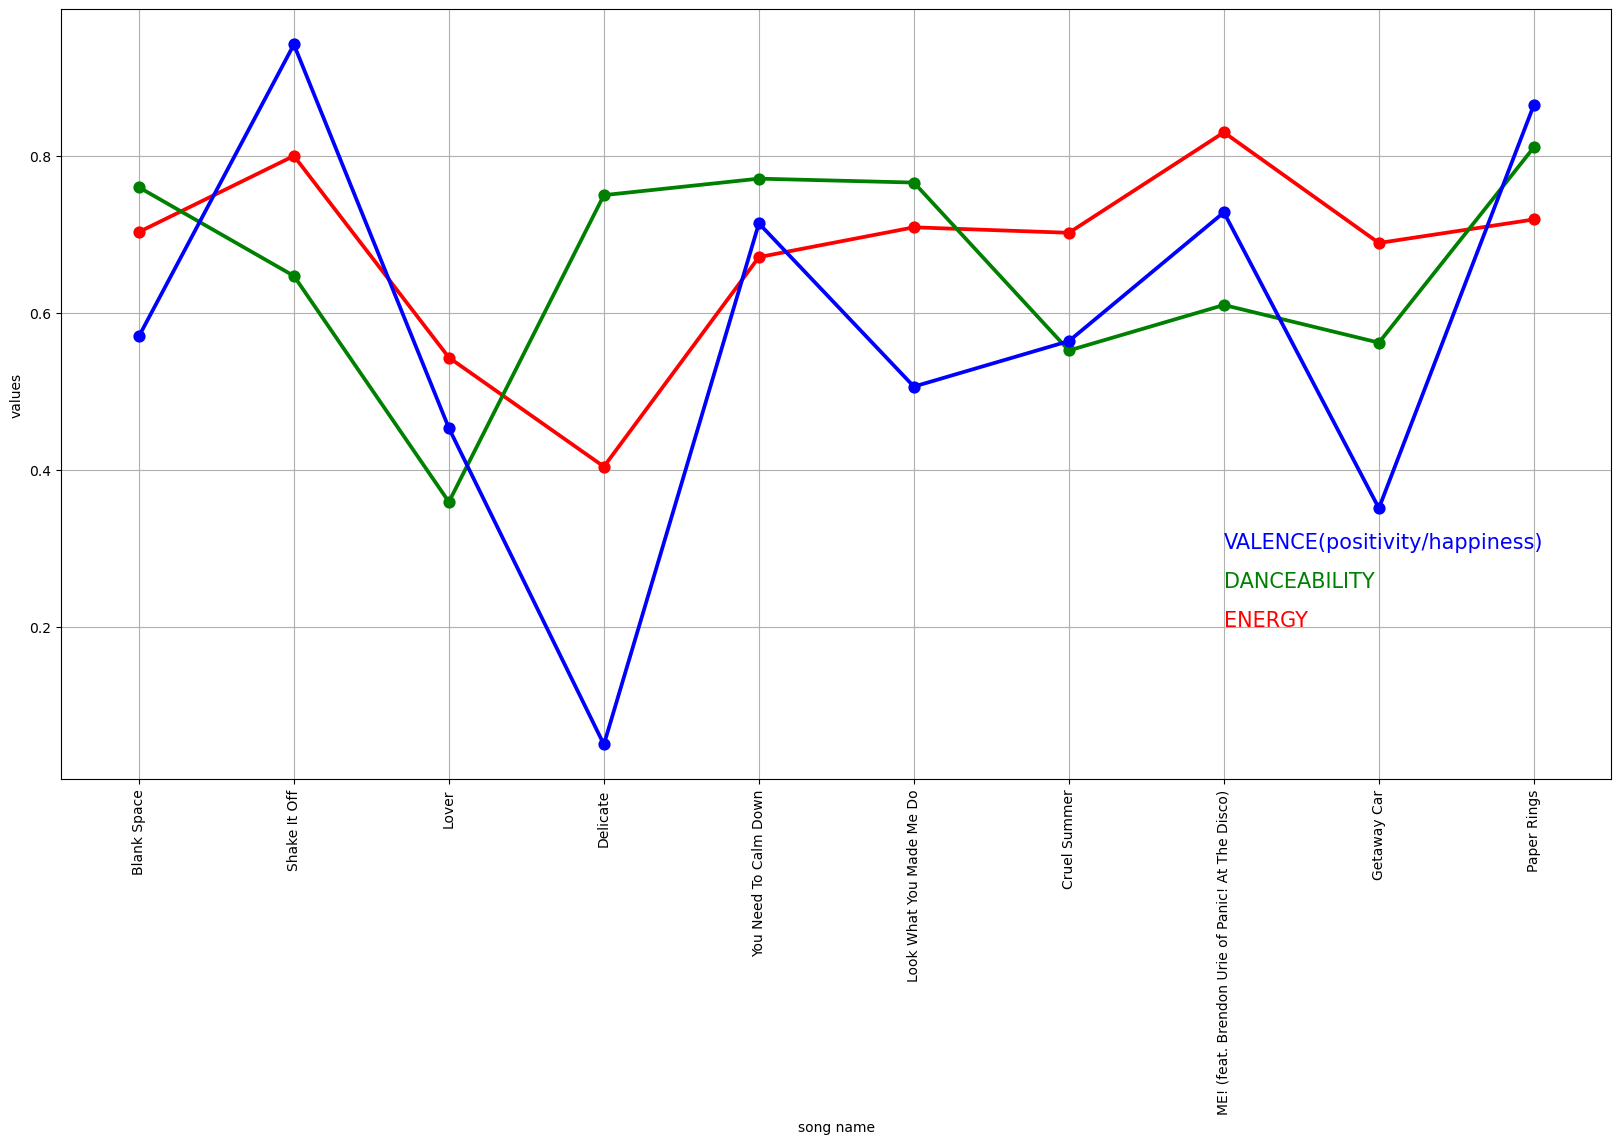

In [40]:
# encontrando relação entre as musicas
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=toptaylor['NAME'], y=toptaylor['ENERGY'], color='red')
sns.pointplot(x=toptaylor['NAME'], y=toptaylor['DANCEABILITY'], color='green')
sns.pointplot(x=toptaylor['NAME'], y=toptaylor['VALENCE'], color='blue')
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('song name')
plt.ylabel('values')
plt.text(7,0.20,'ENERGY', color='red', fontsize=15)
plt.text(7,0.25,'DANCEABILITY', color='green', fontsize=15)
plt.text(7,0.30,'VALENCE(positivity/happiness)', color='blue', fontsize=15)
plt.show()

<AxesSubplot:>

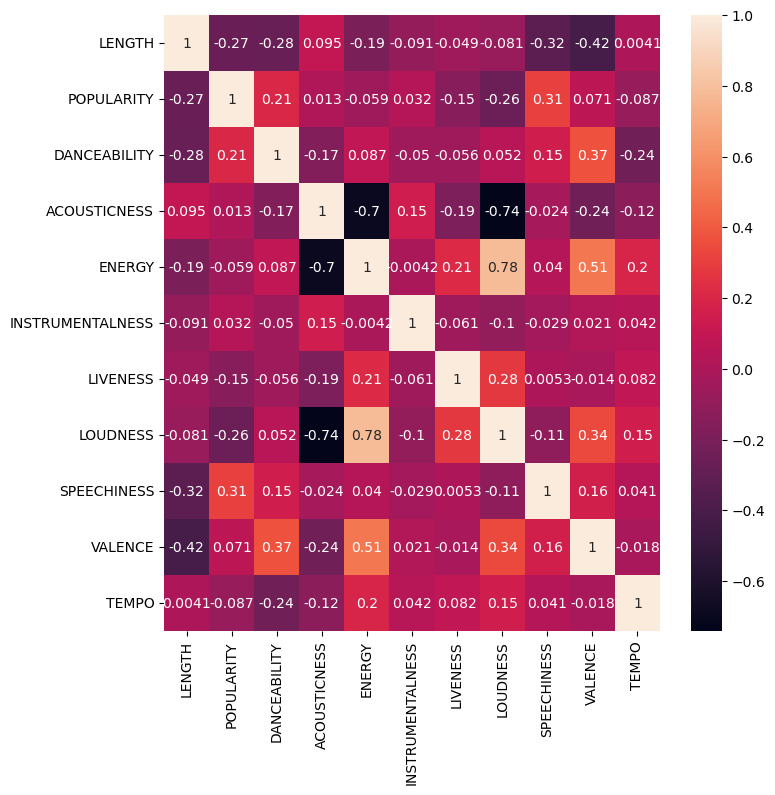

In [42]:
# heatmap
plt.figure(figsize=(8,8))
sns.heatmap(taylor.corr(numeric_only=True),annot=True)

In [ ]:
# Existe uma correlação positiva entre valência e dançabilidade, o que sugere que canções alegres e positivas são mais dançantes.

In [49]:
# 10 músicas mais energicas
taylor_energy = taylor.nlargest(10,['ENERGY'])

# Albuns com as 10 musicas mais energicas
taylor_energy.groupby('ALBUM')['NAME'].value_counts()

ALBUM                        NAME                                         
1989 (Deluxe)                I Wish You Would                                 1
                             New Romantics                                    1
Fearless (Taylor's Version)  Tell Me Why (Taylor’s Version)                   1
                             The Other Side Of The Door (Taylor’s Version)    1
Red (Deluxe Edition)         Red                                              1
                             Red - Original Demo Recording                    1
Speak Now (Deluxe Package)   Better Than Revenge                              1
                             Haunted                                          1
Taylor Swift                 I'm Only Me When I'm With You                    1
                             Picture To Burn                                  1
Name: count, dtype: int64

In [50]:
# 10 músicas mais dançantes
taylor_dance = taylor.nlargest(10,['DANCEABILITY'])

# Albuns com as 10 musicas mais dançantes
taylor_dance.groupby('ALBUM')['NAME'].value_counts()

ALBUM                        NAME                                 
1989 (Deluxe)                Clean                                    1
                             Welcome To New York                      1
Fearless (Taylor's Version)  Hey Stephen (Taylor’s Version)           1
Lover                        Cornelia Street                          1
                             I Think He Knows                         1
                             Paper Rings                              1
                             The Man                                  1
Red (Deluxe Edition)         Treacherous - Original Demo Recording    1
folklore (deluxe version)    the 1                                    1
reputation                   Gorgeous                                 1
Name: count, dtype: int64

In [51]:
# 10 músicas mais positivas 
taylor_dance = taylor.nlargest(10,['VALENCE'])

# Albuns com as 10 musicas mais dançantes
taylor_dance.groupby('ALBUM')['NAME'].value_counts()

ALBUM                        NAME                                   
1989 (Deluxe)                Shake It Off                               1
Fearless (Taylor's Version)  Hey Stephen (Taylor’s Version)             1
Lover                        Paper Rings                                1
Red (Deluxe Edition)         Stay Stay Stay                             1
                             We Are Never Ever Getting Back Together    1
Speak Now (Deluxe Package)   Mean                                       1
                             Speak Now                                  1
                             The Story Of Us                            1
Taylor Swift                 Picture To Burn                            1
evermore (deluxe version)    closure                                    1
Name: count, dtype: int64

In [72]:

# modelo para prever a popularidade dos sons
x = taylor[['LENGTH', 'DANCEABILITY', 'LIVENESS', 'ENERGY', 'LOUDNESS', 'SPEECHINESS', 'VALENCE']]
y = taylor['POPULARITY']



In [65]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
lr=LinearRegression()

In [74]:
# dividir conjunto de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)


In [75]:
# Criar e treinar o modelo de regressão linear
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [79]:
# Avaliar o modelo
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3621565604157879

In [81]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=35)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
r2_score(y_test, y_pred)
print("Accuracy score (training): {0:.3f}".format(regressor.score(x_train, y_train)))
print("Accuracy score (predicted): {0:.3f}".format(regressor.score(x_test, y_test)))

Accuracy score (training): 0.891
Accuracy score (predicted): 0.362


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
  

gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1)
  
# Fit to training set
gbr.fit(x_train, y_train)
  
# Predict on test set
y_pred = gbr.predict(x_test)
  
# test set RMSE
test_rmse = MSE(y_test, y_pred) ** (1 / 2)
  
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))
r2_score(y_test, y_pred)

RMSE test set: 7.53


0.3388916820182394

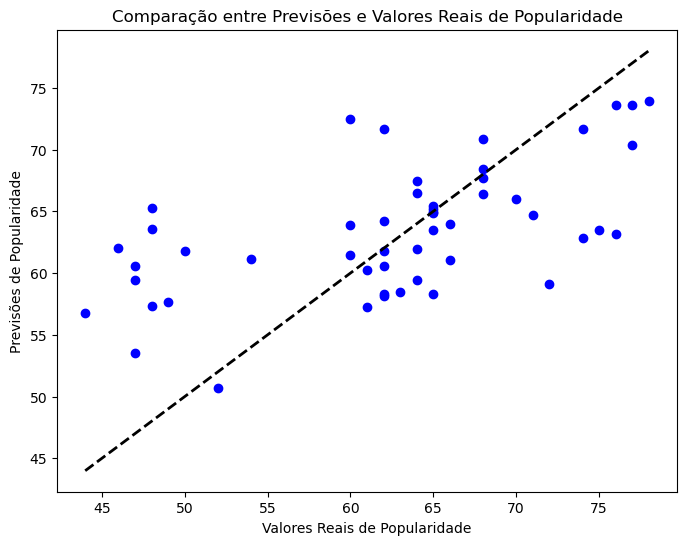

In [88]:
import matplotlib.pyplot as plt

# Criar um gráfico de dispersão para comparar as previsões com os valores reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais de Popularidade')
plt.ylabel('Previsões de Popularidade')
plt.title('Comparação entre Previsões e Valores Reais de Popularidade')
plt.show()
